# iAR package Demo - CIAR Model

In [1]:
import iar
import numpy as np
import matplotlib.pyplot as plt
print("iAR version:")
print(iar.__version__)

iAR version:
1.2.8


# Simulates from a CIAR Model

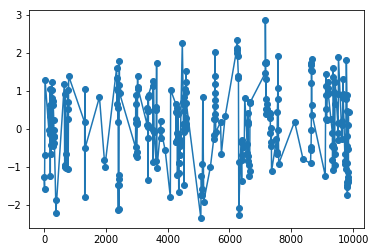

In [2]:
from iar import CIARsample,gentime
np.random.seed(6713)
sT=gentime(n=300)
y,sT,Sigma =CIARsample(n=300,sT=sT,phi_R=0.9,phi_I=0.0,rho=0,c=1)

plt.plot(sT,y,"o-")
plt.show()

# Maximum Likelihood Estimation of the CIAR Model

In [3]:
from iar import CIARphikalman,CIARkalman
y1=y/np.sqrt(np.var(y,ddof=1))
out=CIARphikalman(x=[0.9,0],y=y1,t=sT,c=1,yerr=np.zeros(len(y1)))
print(out)

0.2941232512359818


In [4]:
phi_R,phi_I,out=CIARkalman(y=y1,sT=sT,c=1,niter=4,seed=6713)
print(phi_R)
phi=complex(phi_R, phi_I)
Mod=abs(phi)
print(Mod)

0.9180170897313671
0.9199880190376699


# Simulates a Negatively Correlated CIAR Model

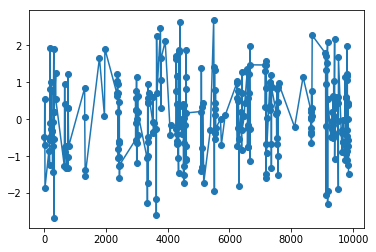

In [5]:
np.random.seed(6713)
sT=gentime(n=300)
y,sT,Sigma =CIARsample(n=300,sT=sT,phi_R=-0.9,phi_I=0.0,rho=0,c=1)

plt.plot(sT,y,"o-")
plt.show()

In [6]:
y1=y/np.sqrt(np.var(y,ddof=1))
phi_R,phi_I,out=CIARkalman(y=y1,sT=sT,c=1,niter=4,seed=6713)
print(phi_R)
phi=complex(phi_R, phi_I)
Mod=abs(phi)
print(Mod)

-0.9156303572022302
0.9156480595461146


# Forecast with CIAR Model

In [7]:
np.random.seed(912)
from iar import CIARforecast
sT=gentime(n=100)
y,sT,Sigma =CIARsample(n=100,sT=sT,phi_R=0.9,phi_I=0.0,rho=0,c=1)
y1=y/np.sqrt(np.var(y,ddof=1))
n=len(sT)
p=int(0.9*n)
ytr=y1[range(p)]
str=sT[range(p)]
yte=y1[range(p,n)]
ste=sT[range(p,n)]
n_ahead=ste-str[p-1]
n_ahead2=np.zeros(1)

final=np.zeros(shape=(len(n_ahead),4))
for i in range(10):
    print(i)
    phi_R,phi_I,out=CIARkalman(y=ytr,sT=str,c=1,niter=4,seed=6713)
    n_ahead2[0]=ste[i]-str[len(str)-1]
    print(n_ahead2)
    fitted,forCIAR,Lambda2,Sighat2=CIARforecast(phi_R,phi_I,ytr,str,tahead=n_ahead2)
    final[i,]=np.hstack((phi_R,yte[i],forCIAR,n_ahead2))
    ytr=np.hstack((ytr,yte[i]))
    str=np.hstack((str,ste[i]))

0
[2.14488759]
1
[2.13161945]
2
[11.72683159]
3
[2.14488759]
4
[10.70856688]
5
[2.99204582]
6
[0.53060566]
7
[12.39390722]
8
[4.98211792]
9
[0.51249562]


In [8]:
import pandas as pd
forecast=pd.DataFrame(final,columns=["phi","Observed Value","Forecasted Value","Time Gap"])
forecast

,phi,Observed Value,Forecasted Value,Time Gap
0,0.821626,0.926667,0.127180,2.144888
1,0.818121,-0.514173,0.602658,2.131619
2,0.818353,-0.112596,-0.672024,11.726832
3,0.810538,0.377749,-0.033762,2.144888
4,0.810778,2.352123,0.279073,10.708567
5,0.812446,0.527906,0.271911,2.992046
6,0.813325,0.870483,0.737337,0.530606
7,0.806661,-0.601606,0.389270,12.393907
8,0.808473,0.783273,-0.025977,4.982118
9,0.807570,0.181180,0.155679,0.512496


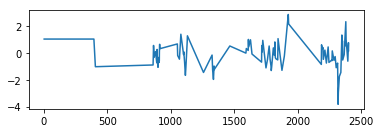

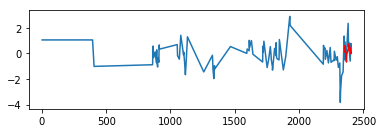

In [9]:
import matplotlib.pyplot as plt

plt.subplot(211)
plt.plot(sT, y1)
plt.show()
plt.subplot(212)
plt.plot(str, ytr)
plt.axis([-n, np.max(sT)+n, np.min(y1)-0.5, np.max(y1)+0.5])
plt.plot(ste, final[:,2],color='red')
plt.show()

[ 0.12717994  0.60265834 -0.67202419 -0.03376193  0.27907339  0.27191142
  0.73733668  0.38926983 -0.02597697  0.15567911]
[ 2.14488759  2.13161945 11.72683159  2.14488759 10.70856688  2.99204582
  0.53060566 12.39390722  4.98211792  0.51249562]


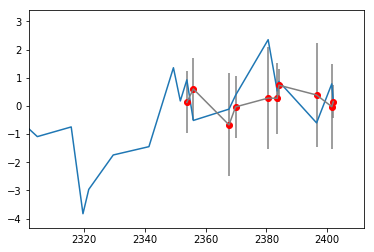

In [10]:
import scipy.stats
print(final[range(10),2])
print(final[range(10),3])
yerr=scipy.stats.norm.ppf(0.975)*np.sqrt(1-Mod**(2*final[range(10),3]))
plt.plot(str, ytr)
plt.axis([np.max(str)-100, np.max(str)+10, np.min(y1)-0.5, np.max(y1)+0.5])
#plt.plot(ste[range(10)], yte[range(10)],"o",color='red')
plt.plot(ste[range(10)], final[range(10),2],"o",color='red')
plt.errorbar(ste[range(10)], final[range(10),2], yerr=yerr,color="gray")
plt.show()